# RBFSeasonality Example

Here is an example of `RBFSeaonality` usage. This example contrats the `RBFSeasonality` with the `FourierSeasonality`. You can play with the parameters
and the data to see how the two seasonality models behave differently.


Generate yearly seasonal data with noise.

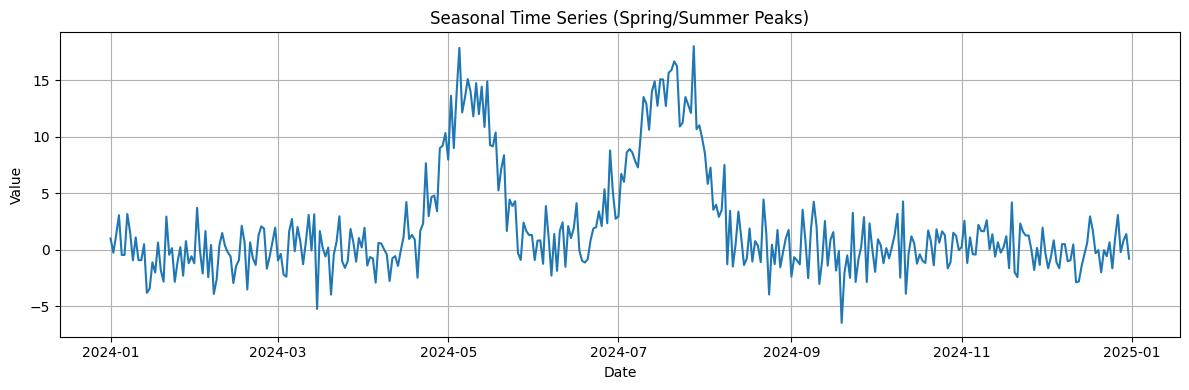

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

# Generate daily date range for one year
date_range = pd.date_range(start="2024-01-01", end="2024-12-31", freq="D")
day_of_year = date_range.dayofyear

# Create smooth seasonality: Gaussian bumps for Spring-Summer
def seasonal_peak(day, center, width):
    return np.exp(-6 * ((day - center) / width) ** 2)

# Peaks in late spring (May) and mid-summer (July)
spring_peak = seasonal_peak(day_of_year, center=130, width=30)   # around May 10
summer_peak = seasonal_peak(day_of_year, center=200, width=40)   # around July 19

# Combine and scale
seasonal_values = (spring_peak + summer_peak) * 15

# Optional noise
noise = np.random.normal(0, 2.0, size=len(date_range))
values = seasonal_values + noise

# Create DataFrame
df = pd.DataFrame({
    "t": date_range,
    "value": values
})

# Plot
plt.figure(figsize=(12, 4))
plt.plot(df["t"], df["value"])
plt.title("Seasonal Time Series (Spring/Summer Peaks)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()


Fit the `RBFSeasonality` model. Default values for `n_peaks` and `sigma` are
20, and 0.1, respectively. When increasing `n_peaks` it is advised to reduce
`sigma` to avoid extremely overlapping peaks.

Output()

<Figure size 1800x100 with 0 Axes>

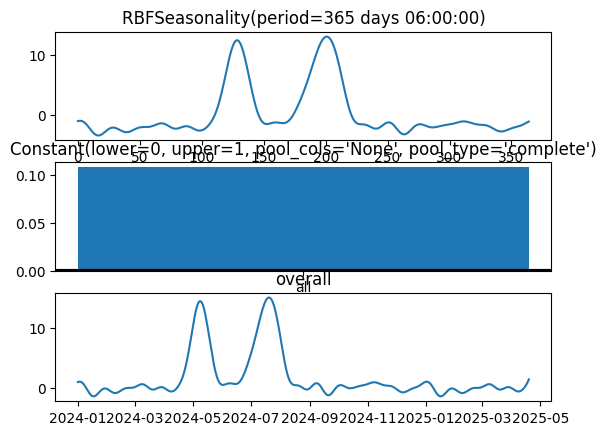

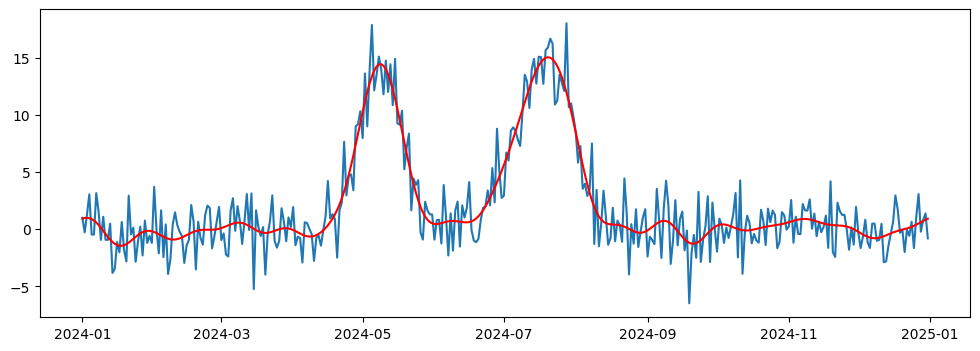

In [6]:
from usopp import RBFSeasonality, Constant
from usopp.likelihood import StudentT

model = (RBFSeasonality(n_peaks=80, sigma=0.1 / 4) + Constant())
#model = FourierSeasonality(n=10) + LinearTrend(n_changepoints=10)
model.fit(df[["t"]], df["value"], use_mcmc=False)
preds = model.predict(df[["t"]])
model.plot_components()

plt.figure(figsize=(12, 4))
plt.plot(df["t"], df["value"], label="Observed")
plt.plot(df["t"], preds, label="Predicted", color='red')

Fit the `FourierSeasonality` model. This is the same as the following prophet
model.

```python
from prophet import Prophet
prop = Prophet(
    yearly_seasonality=40,
    weekly_seasonality=False,
    n_changepoints=1,
    seasonality_mode='additive',
    growth='flat',
)
```

Output()

<Figure size 1800x100 with 0 Axes>

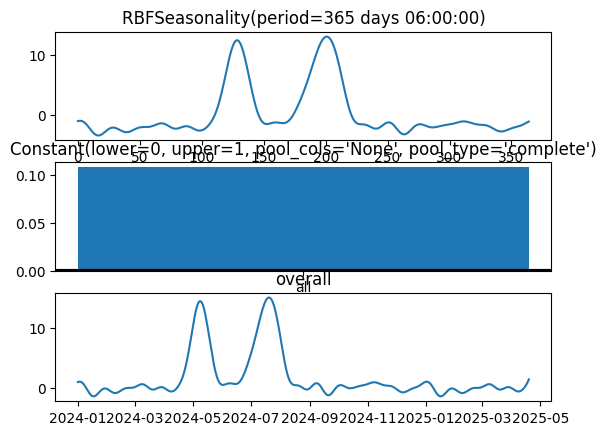

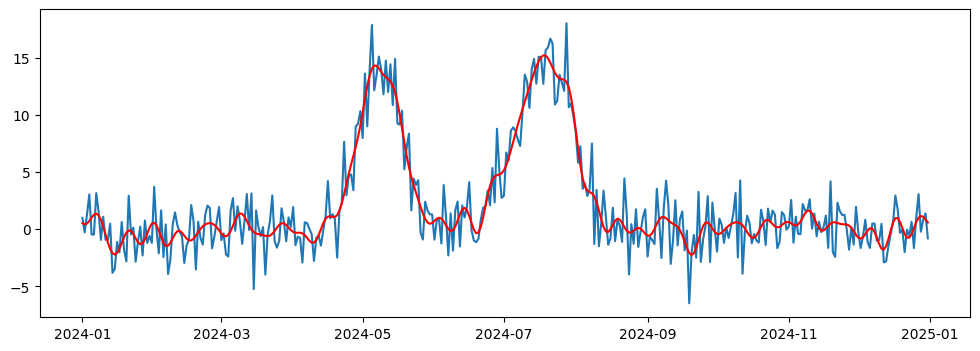

In [7]:
from usopp import RBFSeasonality, LinearTrend, FourierSeasonality, Constant
from usopp.likelihood import StudentT

fourier_model = (FourierSeasonality(n=40) + Constant())
fourier_model.fit(df[["t"]], df["value"], use_mcmc=False)
fourier_preds = fourier_model.predict(df[["t"]])
model.plot_components()

plt.figure(figsize=(12, 4))
plt.plot(df["t"], df["value"], label="Observed")
plt.plot(df["t"], fourier_preds, label="Predicted", color='red')

Plot the results and compare them with the underlying data without the noise.

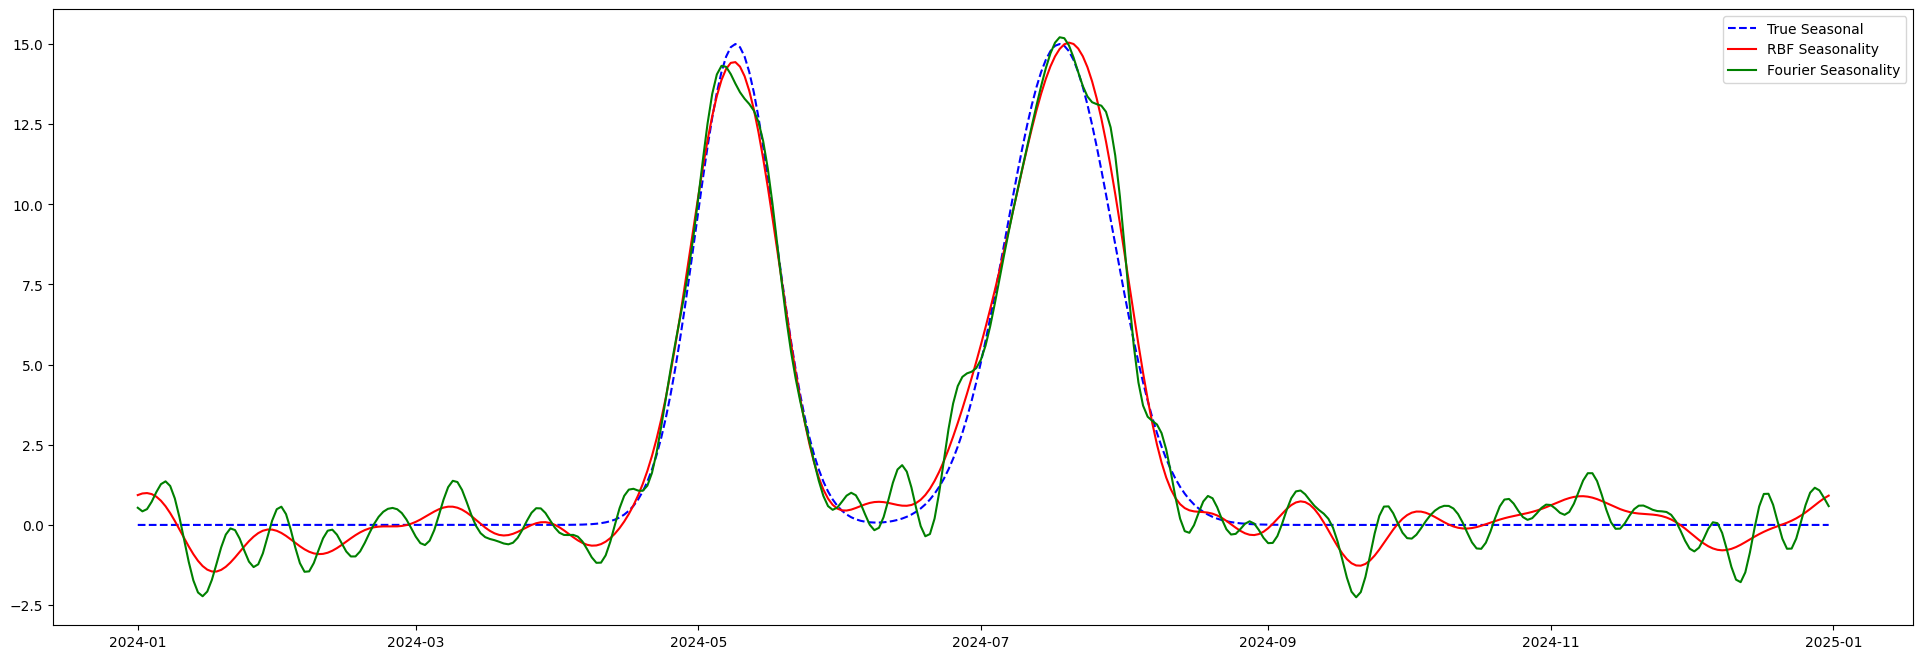

In [8]:
plt.figure(figsize=(24, 8))
plt.plot(df["t"], seasonal_values, "--", label="True Seasonal", color='blue')
plt.plot(df["t"], preds, label="RBF Seasonality", color='red')
plt.plot(df["t"], fourier_preds, label="Fourier Seasonality", color='green')
plt.legend()
plt.show()
